# Group: EASY5Aplus
## Group member: Ruiting Zhu, Zhedi Zhang, Heng'an Wang, Yuxin Liang, Python Song

In [ ]:
github: 

In [1]:
import csv
import sys
import scipy.io
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

C:\Users\zhurt\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import yfinance as yfin
start_date = '2017-01-01' # inclusive
end_date = '2019-12-31' # exclusive

asset_lst = ['GOOG','TSLA','AAPL','GS','A','AAP']

MyData = yfin.download(asset_lst,start=start_date,end=end_date)
MyData = MyData.dropna()
MyData_close = MyData['Adj Close']
MyData_open = MyData['Open']

[*********************100%%**********************]  6 of 6 completed


In [3]:
MyData.head()

Price       Adj Close                                                \
Ticker              A         AAP       AAPL       GOOG          GS   
Date                                                                  
2017-01-03  43.824726  153.925110  26.921545  39.210705  205.021759   
2017-01-04  44.399757  155.188248  26.891417  39.248611  206.345718   
2017-01-05  43.871876  155.079971  27.028170  39.603741  204.809540   
2017-01-06  45.238735  153.049911  27.329487  40.208755  207.847900   
2017-01-09  45.380131  152.959656  27.579809  40.233692  206.142044   

Price                      Close                                    ...  \
Ticker           TSLA          A         AAP       AAPL       GOOG  ...   
Date                                                                ...   
2017-01-03  14.466000  46.490002  170.600006  29.037500  39.306999  ...   
2017-01-04  15.132667  47.099998  172.000000  29.004999  39.345001  ...   
2017-01-05  15.116667  46.540001  171.880005  29.152500  39.701000  ...   
2017-01-06  15.267333  47.990002  169.630005  29.477501  40.307499  ...   
2017-01-09  15.418667  48.139999  169.529999  29.747499  40.332500  ...   

Price            Open                                     Volume          \
Ticker           AAPL       GOOG          GS       TSLA        A     AAP   
Date                                                                       
2017-01-03  28.950001  38.940498  242.699997  14.324000  1739600  691300   
2017-01-04  28.962500  39.417999  241.440002  14.316667  1821300  641700   
2017-01-05  28.980000  39.304001  242.720001  15.094667  1503700  861000   
2017-01-06  29.195000  39.763000  242.289993  15.128667  2883400  828000   
2017-01-09  29.487499  40.320000  243.250000  15.264667  2575300  560100   

Price                                                
Ticker           AAPL      GOOG       GS       TSLA  
Date                                                 
2017-01-03  115127600  33146000  4384200   88849500  
2017-01-04   84472400  21460000  2728700  168202500  
2017-01-05   88774400  26704000  3562600   88675500  
2017-01-06  127007600  32804000  3591100   82918500  
2017-01-09  134247600  25492000  3022800   59692500  

[5 rows x 36 columns]

In [4]:
# make sure the data are matched
assert (MyData_close.index == MyData_open.index).all(), "Unmatch"

# get return
MyReturns = pd.DataFrame()
MyReturns.index = MyData_close.index

for stock in  ['GOOG','TSLA','AAPL','GS','A','AAP']:
    MyReturns[f'{stock}'] = (MyData_close[f'{stock}'] - MyData_open[f'{stock}']) / MyData_open[f'{stock}']

print(MyReturns)


                GOOG      TSLA      AAPL        GS         A       AAP
Date                                                                  
2017-01-03  0.006939  0.009913 -0.070068 -0.155246 -0.045837 -0.098694
2017-01-04 -0.004297  0.056997 -0.071509 -0.145354 -0.053915 -0.089110
2017-01-05  0.007626  0.001457 -0.067351 -0.156190 -0.067548 -0.092410
2017-01-06  0.011210  0.009166 -0.063898 -0.142152 -0.029836 -0.106643
2017-01-09 -0.002141  0.010089 -0.064695 -0.152551 -0.054777 -0.100555
...              ...       ...       ...       ...       ...       ...
2019-12-23 -0.007622  0.018068 -0.017446 -0.113011 -0.035672 -0.082878
2019-12-24 -0.006104  0.016469 -0.030883 -0.107193 -0.035559 -0.090362
2019-12-26  0.008095  0.007081 -0.012106 -0.107136 -0.032277 -0.100030
2019-12-27 -0.010574 -0.010621 -0.033852 -0.115216 -0.036794 -0.099282
2019-12-30 -0.012691 -0.032860 -0.022544 -0.118020 -0.036814 -0.088500

[753 rows x 6 columns]


In [5]:
# Calculate expected returns and covariance matrix
expected_returns = MyReturns.mean() *252  # Annualize daily returns
cov_matrix = MyReturns.cov()*252          # Annualize covariance matrix

# Preview expected returns and covariance matrix
print("Expected Annual Returns:")
print(expected_returns)

print("\nCovariance Matrix:")
print(cov_matrix)

Expected Annual Returns:
GOOG    -0.468219
TSLA     0.251884
AAPL   -12.508948
GS     -33.950360
A      -11.450294
AAP    -24.127890
dtype: float64

Covariance Matrix:
          GOOG      TSLA      AAPL        GS         A       AAP
GOOG  0.036081  0.027485  0.020950  0.015087  0.016588  0.008158
TSLA  0.027485  0.146195  0.023385  0.018588  0.019350  0.009597
AAPL  0.020950  0.023385  0.069527  0.050187  0.036341  0.014943
GS    0.015087  0.018588  0.050187  0.063362  0.033349  0.014531
A     0.016588  0.019350  0.036341  0.033349  0.044250  0.011586
AAP   0.008158  0.009597  0.014943  0.014531  0.011586  0.056752


# Task 1

In [6]:
import cvxpy as cp

In [7]:
MyReturns_use = MyReturns.loc['2017-01-03':'2019-01-01']

In [32]:
def optimal_portfolio_q1(ret_data, theta, pi):
    '''
    find the optimal weight under given theta and pi
    '''
    n = ret_data.shape[1]  # number of stocks
    T = ret_data.shape[0]  # day count
    
    x = cp.Variable(n)

    # Calculate the average return for each stock
    r_bar = ret_data.mean().values  

    # Constructing the 1st part objective function: negative average return
    return_part = -r_bar @ x 

    # Constructing the 2nd part objective function
    # Daily excess returns
    excess_returns = ret_data.values - r_bar

    # Calculate risk part
    risk_part = cp.pnorm(excess_returns @ x, pi) / T
    
    # Constructing the final objective function
    objective = cp.Minimize(return_part + theta * risk_part)

    # Add constraints that are non-negative and sum to 1
    constraints = [x >= 0, cp.sum(x) == 1]

    # Solve the problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # Return results
    return x.value
    

In [33]:
def optimal_portfolio_dict_q1(ret_data, theta_values, pi_values):
    '''
    restore the optimal portfolio and their parameter using a dictionary
    '''
    #  (theta, pi) 
    results = {}

    for theta in theta_values:
        for pi in pi_values:
            results[(theta, pi)] = optimal_portfolio_q1(ret_data, theta, pi)
    
    return results

In [34]:
# define data and parameters
ret_data = MyReturns_use
theta_values = np.linspace(0, 20, 50)
pi_values = np.linspace(2, 6.5, 10)

# calculate optimal portfolio
optimal_portfolio_candidate_q1 = optimal_portfolio_dict_q1(ret_data, theta_values, pi_values)

optimal_portfolio_candidate_q1

{(0.0,
  2.0): array([7.81569393e-07, 9.99999177e-01, 1.36246580e-08, 3.13639978e-09,
        1.81202594e-08, 6.42068187e-09]),
 (0.0,
  2.5): array([1.73049107e-08, 9.99999982e-01, 2.62649549e-10, 5.25296913e-11,
        4.01681024e-10, 1.56554890e-10]),
 (0.0,
  3.0): array([5.78601864e-09, 9.99999992e-01, 8.07615909e-10, 3.84880430e-10,
        8.37848040e-10, 4.82531608e-10]),
 (0.0,
  3.5): array([3.12508969e-07, 9.99999660e-01, 9.06792995e-09, 3.60745124e-09,
        9.87612695e-09, 4.91483600e-09]),
 (0.0,
  4.0): array([1.26479321e-07, 9.99999869e-01, 1.20901391e-09, 6.78512047e-10,
        1.47008761e-09, 1.20357619e-09]),
 (0.0,
  4.5): array([7.36878562e-09, 9.99999992e-01, 1.20001680e-10, 9.23307977e-11,
        1.10216311e-10, 1.35098020e-10]),
 (0.0,
  5.0): array([7.19363746e-08, 9.99999917e-01, 3.37508525e-09, 1.63230259e-09,
        3.55612852e-09, 2.04884960e-09]),
 (0.0,
  5.5): array([3.17093822e-08, 9.99999968e-01, 3.63962695e-11, 1.21383529e-11,
        4.29387125

### Conclusion
We see Tesla has the highest weight for most of the time because of its high avarage return. But when the theta and pi goes up, which means the risk matters more, the weight of Tesla may goes down because of its high variance.

# Task 2

## 2.1 Using covariance

In [15]:
def optimal_portfolio_q2_1(ret_data, theta):
    '''
    Optimization model for question 2 using cov matrix
    theta: risk aversion parameter
    
    '''
    # Calculate expected returns and covariance matrix
    expected_returns = ret_data.mean() 
    cov_matrix = ret_data.cov()
    
    num_assets = len(expected_returns)
    x = cp.Variable(num_assets)  # Portfolio weights

    if type(expected_returns) != np.ndarray:  # in case the input is a Series
      expected_returns = expected_returns.values

    portfolio_return = expected_returns @ x  # matrix multiplication in cvxpy

    portfolio_risk = cp.quad_form(x, cov_matrix)

    # Objective
    objective = cp.Minimize(theta * portfolio_risk - portfolio_return)

    # Constraints
    constraints = [cp.sum(x) == 1,  # Weights must sum to 1
                   x >= 0]  # No short selling

    # Solve the optimization problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    return x.value  # Return the optimal weights

In [16]:
def optimal_portfolio_dict_q2_1(ret_data, theta_values):
    '''
    store the optimal portfolio for each theta
    '''
    results = {}

    for theta in theta_values:
        results[theta] = optimal_portfolio_q2_1(ret_data, theta)
    
    return results

In [17]:
ret_data = MyReturns_use
theta_values = np.linspace(0, 20, 50)

optimal_portfolio_candidate_q2_1 = optimal_portfolio_dict_q2_1(ret_data, theta_values)

optimal_portfolio_candidate_q2_1

{0.0: array([6.07153717e-24, 1.00000000e+00, 6.07153756e-24, 6.07153816e-24,
        6.07153751e-24, 1.17093840e-22]),
 0.40816326530612246: array([ 5.64521081e-24,  1.00000000e+00,  5.64686238e-24,  5.64676944e-24,
        -4.98653182e-23,  5.64639462e-24]),
 0.8163265306122449: array([ 4.78496119e-24,  1.00000000e+00, -4.89882066e-23, -1.04499536e-22,
         6.20320645e-23,  6.52202373e-24]),
 1.2244897959183674: array([ 1.30317616e-23,  1.00000000e+00,  6.09769177e-24,  2.28142042e-22,
        -1.04927615e-22,  1.17118637e-22]),
 1.6326530612244898: array([5.23212490e-24, 1.00000000e+00, 3.50374545e-24, 2.25548027e-22,
        3.49979553e-24, 3.50196741e-24]),
 2.0408163265306123: array([ 9.57531132e-24,  1.00000000e+00, -1.07510703e-22, -1.07511087e-22,
        -5.20044184e-23, -1.07512885e-22]),
 2.4489795918367347: array([ 6.97934076e-24,  1.00000000e+00,  6.98859182e-24, -1.04034146e-22,
         6.24939882e-23, -1.04036280e-22]),
 2.857142857142857: array([1.01990248e-02, 9.8

### Conclusion:
The result is quite similar with task 1, and the reasons are the same.

## 2.2 Using PCA

[![p1.png](https://i.postimg.cc/7hKCB3dB/p1.png)](https://postimg.cc/4HhNy9Jt)
[![p2.png](https://i.postimg.cc/dtSkr983/p2.png)](https://postimg.cc/JGZzWZYC)

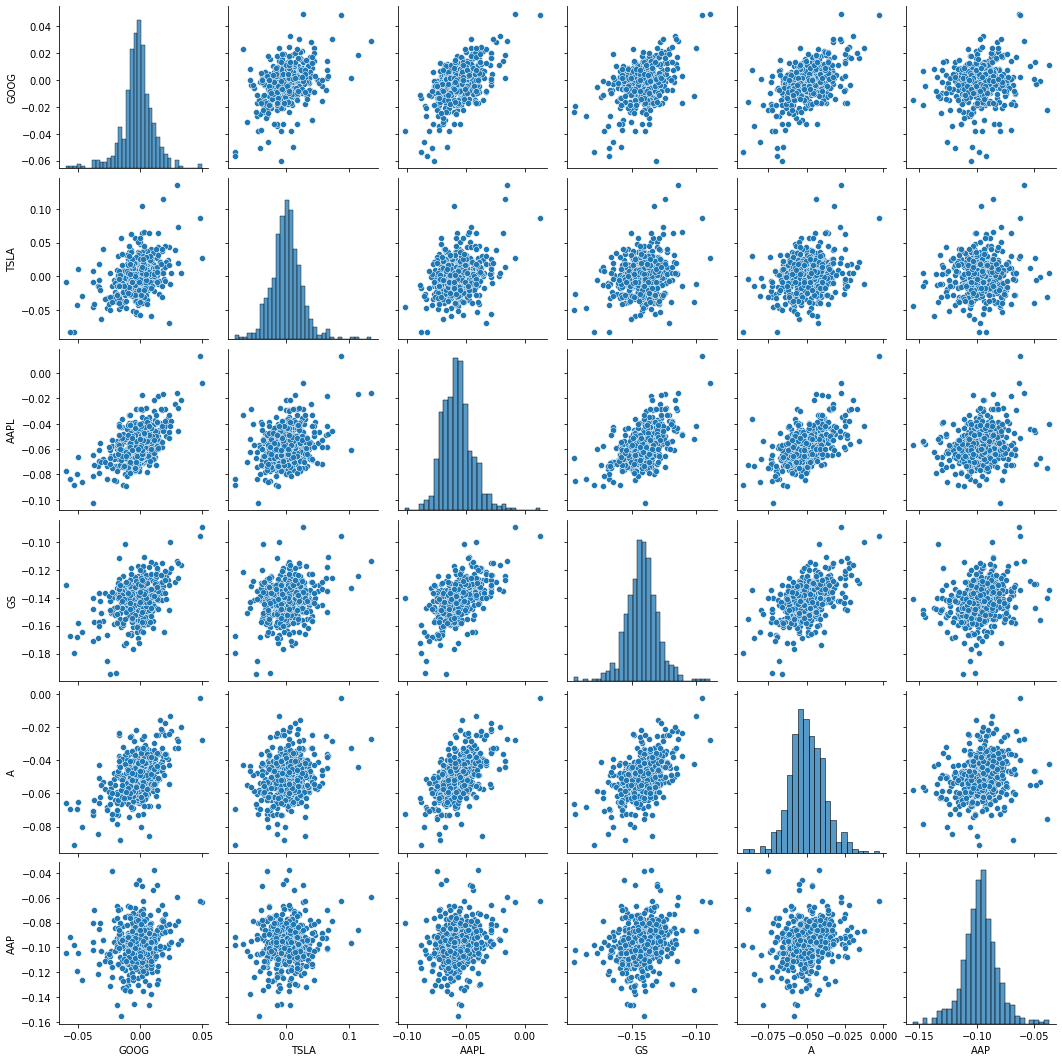

In [18]:
import seaborn as sns
sns.pairplot(MyReturns_use[['GOOG','TSLA','AAPL','GS','A','AAP']])

In [22]:
from sklearn.decomposition import PCA

def pca_dimension(ret_data, threshold = 0.90):
    '''
    Find the optimal pca dimension. 
    The optimal means the minimal dimension which has the sum explained variance greater or equal to 0.90.
    
    pca_input: standardized return data
    threshold: the percentage that we want our sum explained variance to exceed
    '''
    #standardization
    pca_input = (ret_data - ret_data.mean()) / ret_data.std()
    
    #PCA
    pca = PCA()  
    pca.fit(pca_input)
    
    #find the dimemsion that has good explanation
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    optimal_dimension = np.argmax(cumulative_variance >= threshold) + 1
    
    pca_optimal = PCA(n_components=optimal_dimension)
    pca_optimal.fit(pca_input)
    
    return pca_optimal, optimal_dimension

The optimal PCA dimension is 5.
The explained variance ratios are: [0.47566488 0.15469284 0.14064759 0.08908735 0.07513737].
Total explained variance is 0.9352300410192478


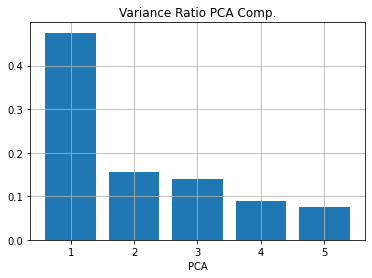

In [23]:
# show the optimal pca dimension and the explained variance

ret_data = MyReturns_use
result = pca_dimension(ret_data, threshold = 0.90)

print(f'The optimal PCA dimension is {result[1]}.\nThe explained variance ratios are: {result[0].explained_variance_ratio_}.\nTotal explained variance is {result[0].explained_variance_ratio_.sum()}')

temp = np.linspace(1,result[1],result[1])
plt.bar(temp, result[0].explained_variance_ratio_)
plt.title("Variance Ratio PCA Comp.")
plt.xlabel('PCA')
plt.grid()

In [29]:
def pca_parameter(pca_input, pca):
    '''
    Calculate main pca parameters
    
    Z: principle components, also the factor in the factor model. The dimension should be (502,5)
    V: the eigenvectors of standardized return data, also as the relation between return and factors in the factor model. The dimension should be (6,5)
    F: factor covariance matrix. The dimension should be (5,5)
    sigma_squared_value: the variance of sigma_squares, sigma is the residual
    
    '''
    # Z as principle components
    principle_components = pca.fit_transform(pca_input)
    Z = principle_components
    V = pca.components_.T
    F = np.cov(Z.T)
    residuals = pca_input - Z @ V.T
    sigma_squared = (residuals ** 2).mean()
    sigma_squared_value = sigma_squared.values
    
    #print(f'Z:{Z}\n shape of Z: {Z.shape}\n')
    #print(f'V:{V}\n shape of V: {V.shape}\n')
    #print(f'F:{F}\n shape of F: {F.shape}\n')
    #print(f'sigma_squared_value:{sigma_squared_value}\n shape of sigma_squared_value: {sigma_squared_value.shape}\n')
    
    return Z, V, F, sigma_squared_value

In [30]:
def optimal_portfolio_q2_2(ret_data, V, F, sigma_squared_value, theta):
    '''
    Optimization model for question 2
    
    ret_data: return data (without standardization)
    V: the eigenvectors of standardized return data, also as the relation between return and factors in the factor model
    F: factor covariance matrix
    sigma_squared_value: the variance of sigma_squares, sigma is the residual
    theta: risk aversion parameter
    
    '''
    n = ret_data.shape[1]  # stock number

    x = cp.Variable(n)

    # average return 
    r_bar = ret_data.mean().values   
    
    # first part of objective function: negative mean return
    return_part = -r_bar @ x

    # second part of objective function: risk
    risk_part = cp.quad_form(x @ V, F) + cp.sum(cp.multiply(sigma_squared_value, x**2))

    # total objective function
    objective = cp.Minimize(return_part + theta * risk_part)

    # constraints
    constraints = [x >= 0, cp.sum(x) == 1]

    # solve problem
    problem = cp.Problem(objective, constraints)
    problem.solve()

    # return the optimal weight of each stock
    return x.value



def optimal_portfolio_dict_q2_2(ret_data, theta_values):
    '''
    store the optimal portfolio for each theta
    '''
    results = {}

    for theta in theta_values:
        results[theta] = optimal_portfolio_q2_2(ret_data, V, F, sigma_squared_value, theta)
    
    return results

In [31]:
ret_data = MyReturns_use
theta_values = np.linspace(0, 20, 50)

pca_input = (ret_data - ret_data.mean()) / ret_data.std()
pca = pca_dimension(pca_input, threshold = 0.90)[0]
Z, V, F, sigma_squared_value = pca_parameter(pca_input, pca)

optimal_portfolio_candidate_q2_2 = optimal_portfolio_dict_q2_2(ret_data, theta_values)

optimal_portfolio_candidate_q2_2


{0.0: array([ 3.13563529e-23,  1.00000000e+00,  2.82656723e-23, -4.16282599e-22,
         8.35198947e-23,  2.80190860e-23]),
 0.40816326530612246: array([ 1.96848712e-01,  3.26545174e-01,  8.13339175e-02, -1.43108056e-22,
         1.41366855e-01,  2.53905343e-01]),
 0.8163265306122449: array([0.16202944, 0.29638753, 0.07635679, 0.04834089, 0.13645394,
        0.2804314 ]),
 1.2244897959183674: array([0.15638437, 0.28459465, 0.05714134, 0.08664813, 0.12948419,
        0.28574732]),
 1.6326530612244898: array([0.15356184, 0.27869821, 0.04753361, 0.10580176, 0.12599931,
        0.28840528]),
 2.0408163265306123: array([0.15186832, 0.27516035, 0.04176897, 0.11729393, 0.12390838,
        0.29000005]),
 2.4489795918367347: array([0.15073931, 0.27280177, 0.03792588, 0.12495538, 0.12251443,
        0.29106323]),
 2.857142857142857: array([0.14993287, 0.27111708, 0.03518081, 0.13042784, 0.12151875,
        0.29182265]),
 3.2653061224489797: array([0.14932804, 0.26985355, 0.03312202, 0.13453219,

# Task 3 

In **Task 3**, we are asked to select the best portfolio from the candidates obtained in **Tasks 1 and 2**. The candidates vary based on different parameter values of $ \pi $ and $theta$. The evaluation period is from **2019-01-01** to **2019-06-30**, during which, for each trading day, we invest an amount proportional to the portfolio weights at market open and close the position at the end of the day. The goal is to select the portfolio that maximizes total revenue over the entire period.

In [35]:
# gather optimal portfolio from q1 and q2
optimal_portfolio_all = {**optimal_portfolio_candidate_q1, **optimal_portfolio_candidate_q2_1, **optimal_portfolio_candidate_q2_2}

MyReturns_q3 = MyReturns.loc['2019-01-01':'2019-06-30']
sum_returns = MyReturns_q3.sum() 

For each candidate portfolio, we calculate the **total return** over the entire period by multiplying the portfolio weights scaled by $ 10^9 $ by the summed returns for each stock.

In [36]:
def best_portfolio(optimal_portfolio_all, sum_returns):
    '''
    calculate the single best portfolio that reach the maximum total return
    optimal_portfolio_all: optimal portfolio under given parameters(pi and theta) from q1 and q2
    sum_returns: sum of daily return of each stock
    '''
    portfolio_returns = {}

    for i, weights in optimal_portfolio_all.items():
        expected_return = np.dot(weights*10**9, sum_returns.values)  # calculate return
        portfolio_returns[i] = expected_return

    # find the portfolio with maximum return a
    max_theta = max(portfolio_returns, key=portfolio_returns.get)
    max_return = portfolio_returns[max_theta]
    optimal_weights = optimal_portfolio_all[max_theta]
    
    return max_theta, max_return, optimal_weights


**Optimal Portfolio Selection**:

Once we have the total return for each portfolio, we select the portfolio that delivers the **maximum total return**. The optimal portfolio’s parameters $ \pi $ and $ \theta $ and the associated weights are then outputted.

In [37]:
max_theta, max_return, optimal_weights = best_portfolio(optimal_portfolio_all, sum_returns)
print(f"Parameter: {max_theta}")
print(f"Optimal weight: {optimal_weights}")
print(f"Total return of portfolio: {max_return}")

Parameter: (2.0408163265306123, 5.0)
Optimal weight: [ 7.30795637e-10  9.99999999e-01 -5.66502706e-12 -2.38963550e-11
 -1.09969305e-12 -1.81029335e-11]
Total return of portfolio: 22732724.824914426


### Conclusion

The selected portfolio is heavily weighted towards **TSLA** with a weight close to 1, while the weights of the other assets are negligibly small (almost zero). Despite most stocks having relatively low cumulative returns over the evaluation period, **TSLA**'s strong performance played a very important role in maximizing the portfolio’s total return. 

This indicates that certain stocks, even if they make up the majority of a portfolio, can heavily influence the overall return. In this case, **TSLA**'s performance led to the selection of the optimal portfolio.

# Task 4

This task requires us to benchmark the performance of the previously selected optimal portfolio on the remaining trading days from **2019-07-01** to **2019-12-31**. We aim to calculate the total return and report the average return earned by the portfolio.



In [38]:
MyReturns_q4 = MyReturns.loc['2019-07-01':'2019-12-31']
sum_returns_q4 = MyReturns_q4.sum()  

final_return = np.dot(optimal_weights*10**9, sum_returns_q4.values)
print(f"Total return of portfolio: {final_return}")

Total return of portfolio: 371775056.77573717


### Conclusion

According to the calculation results, we can know that the total return of the portfolio over the second half of 2019 is **371,775,062.43**. This result demonstrates that the portfolio selected based on the first half of the year continued to perform positively during the second half.

# Individual Contribution:


* Ruiting Zhu: (1) Attend group meetings. (2) Write the code solution for 1/2/3/4 task. (3) Write the explanation for task2.
* Zhedi Zhang: (1) Attended group meetings. (2) Write the code for Task 1/2/3.
* Heng'an Wang: (1) Attended group meetings to discuss  the problems. (2) Write the draft code of task1 to printe efficient frontier.
* Yuxin Liang: (1) Attended group meetings to discuss the problems.(2) Write the code and notes of task1 and print efficient frontier.
* Python Song: (1) Attended group discussions. (2) Modify the code for Task 2/3/4 to improve the time complexity. (3) Write the notes and explanation for Task 3/4 to improve the readability